Erro médio quadrático nos dados de teste: 0.9593601822853088


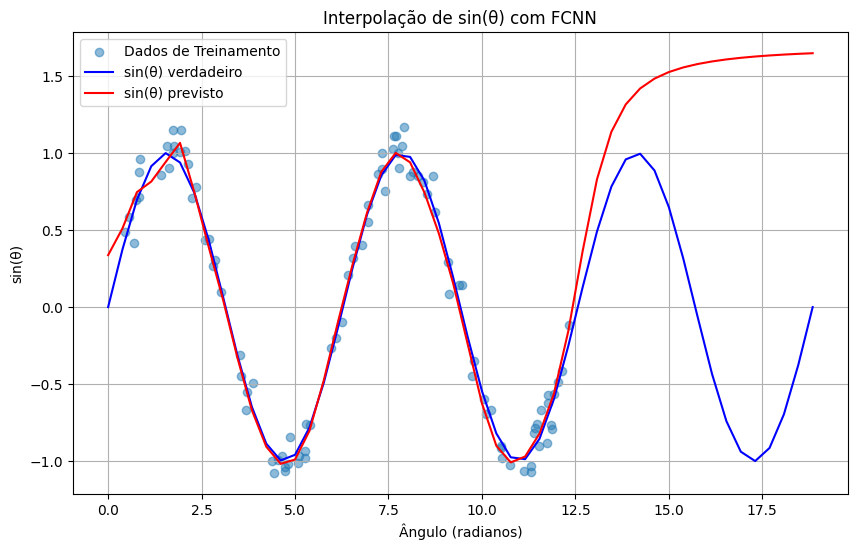

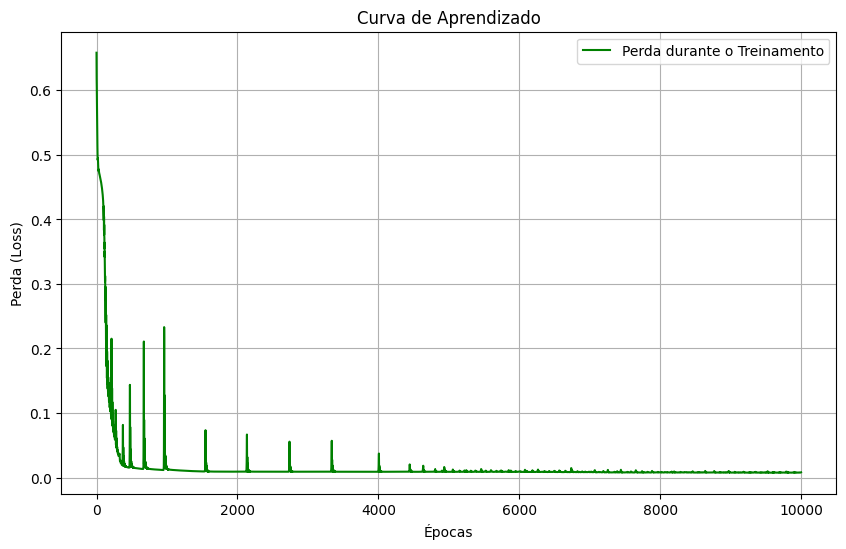

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate training data
torch.manual_seed(42)  # to reproducibility
num_samples = 100
angles_train = torch.tensor(np.random.uniform(0, 4 * np.pi, num_samples).reshape(-1, 1), dtype=torch.float32)
sin_values_train = torch.sin(angles_train)

# Add some noise to the training data
noise = torch.normal(mean=0, std=0.1, size=sin_values_train.shape)
sin_values_train += noise

# 2. Define the model of FCNN
class FCNNModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(1, 10)
        self.fc2 = torch.nn.Linear(10, 10)
        self.fc3 = torch.nn.Linear(10, 10)
        self.fc4 = torch.nn.Linear(10, 1)
        self.activation = torch.nn.Tanh()

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        x = self.fc4(x)
        return x

model = FCNNModel()

# 3. Treine the model
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Adicionar list to armazenate losses
losses = []

# Loop of training epochs
epochs = 10000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    predictions = model(angles_train)
    loss = criterion(predictions, sin_values_train)
    loss.backward()
    optimizer.step()

    # Save atual loss
    losses.append(loss.item())

# 4. Generate test data
num_test_samples = 50
angles_test = torch.tensor(np.linspace(0, 6 * np.pi, num_test_samples).reshape(-1, 1), dtype=torch.float32)
sin_values_true = torch.sin(angles_test)

# 5. make predictions on test data
model.eval()
with torch.no_grad():
    sin_values_predicted = model(angles_test)

# 6. evaluate the model
mse = torch.nn.functional.mse_loss(sin_values_predicted, sin_values_true)
print(f"Erro médio quadrático nos dados de teste: {mse.item()}")

# 7. Vizualize the results
plt.figure(figsize=(10, 6))
plt.scatter(angles_train.numpy(), sin_values_train.numpy(), label='Dados de Treinamento', alpha=0.5)
plt.plot(angles_test.numpy(), sin_values_true.numpy(), label='sin(θ) verdadeiro', color='blue')
plt.plot(angles_test.numpy(), sin_values_predicted.numpy(), label='sin(θ) previsto', color='red')
plt.xlabel('Ângulo (radianos)')
plt.ylabel('sin(θ)')
plt.title('Interpolação de sin(θ) com FCNN')
plt.legend()
plt.grid(True)
plt.show()

# 8. Vizualize the learning curve
plt.figure(figsize=(10, 6))
plt.plot(losses, label='Perda durante o Treinamento', color='green')
plt.xlabel('Épocas')
plt.ylabel('Perda (Loss)')
plt.title('Curva de Aprendizado')
plt.legend()
plt.grid(True)
plt.show()
